# Hipotez ve Tek Örneklem T Testi Uygulamaları

## Tek Örneklem T Testi

**Tek Örneklem T Testi**

Örnek ortalamasına ilişkin test yapmak için kullanılır.

**Hipotezler:**

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>




<table></table>

**Test İstatistiği:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$


### İş Ugulaması : Web Sitesinde Geçirilen Sürenin Testi

Problem: Web sitemizde geçirelen ortalama süre gerçekten 170 saniye mi?

Detaylar:

    - Yazılımlardan elde edilen web sitesinde geçirilem ort. süreler var.
   
    - Bu veriler incelendiğinde bir yönetici ya da çalışanımız bu değerlerin böyle olmadığına yönelik düşüncelerr taşıyor ve bu durumu test etmek istiyor.

---------------------------------------------------

In [74]:
import numpy as np
import pandas as pd
olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119,

              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,

              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110,

              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [75]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [76]:
import scipy.stats as stats

Burada ise verilerimizin betimsel istatistiklerini inceleyeceğiz. Bunun için stats içerisindeki özel bir describe fonksiyonunu kullanıyoruz.

In [77]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

Buradaki değerr şans eseri oluşmuş olabilir. Yani bizim burada çektiğimiz 100 örneklem bize asıl istatistiği vermiyor olabilir. Bu yüzden Tek orneklem T Testi yapmamız gerekiyor. Bunun için varsayımlar kuralım.


#### Varsayımlar

**--normallik varsayımı--**

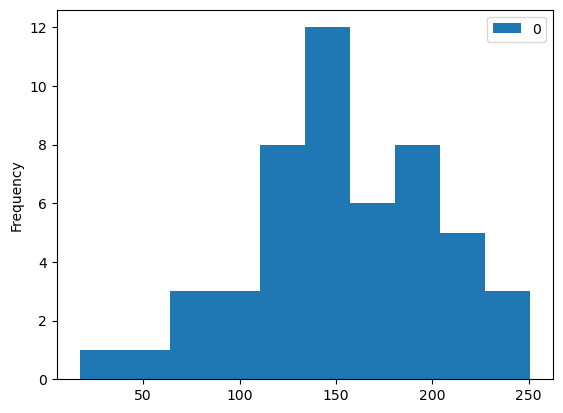

In [78]:
# Histogram
pd.DataFrame(olcumler).plot.hist();

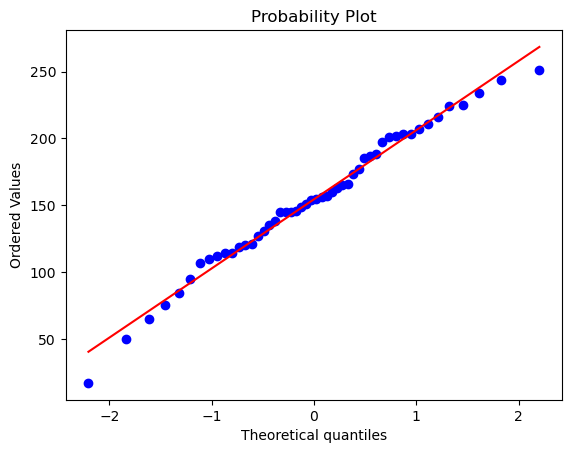

In [79]:
# qqplot
import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

--------------------------------

#### Shapiro-Wilks Testi

**Shapiro-Wilks Testi**

H0: Örnek dağılım ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık yoktur.

H1: Örnek dağılım ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık vardır.

In [80]:
from scipy.stats import shapiro

In [81]:
shapiro(olcumler)

ShapiroResult(statistic=0.9853101372718811, pvalue=0.7848551869392395)

In [82]:
print("T hesap istatistiği :" + str(shapiro(olcumler)[0]))
print("Hesaplanan P-value: :" + str(shapiro(olcumler)[1]))

T hesap istatistiği :0.9853101372718811
Hesaplanan P-value: :0.7848551869392395


**Bu sonuçlara bakılarak H0 reddedilemez. Varsayımları sağlanıyor mu onu denedik.**

#### Hipotez testini uygulayanması

In [83]:
stats.ttest_1samp(olcumler, popmean=170)

TtestResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446, df=49)

**H0: Web sitesinde geçirilen ortalama süre 170 saniyedir.**

**H1: Web sitesinde geçirilen ortalama süre 170 saniye değildir.**

**Hipotezlerimiz bunlardı p-value değerimiz 0.05 den daha küçük olduğu için H0 reddedilir.**

#### Nanparametrik Tek Örneklem Testi

In [84]:
from statsmodels.stats.descriptivestats import sign_test

In [85]:
sign_test(olcumler, 170)

(-7.0, 0.06490864707227217)

## Tek Örneklem Oran Testi

Tek Örneklem Oran Testi, bir örneklemdeki oranı, bilinen veya varsayılan bir popülasyon oranıyla karşılaştırmak için kullanılan bir istatistiksel testtir. Örneğin, bir müşteri grubunun %60'ının bir üründen memnun olduğunu belirten bir popülasyon oranı varsayalım. Yeni bir örneklemde bu oranı test etmek için Tek Örneklem Oran Testi yapılabilir.

**Varsayımları:**

    1.Verilerin kategorik olması (örneğin, memnun/memnun değil),
    2.Örneklemdeki gözlem sayısının yeterli büyüklükte olmasıdır.
Bu test, örneklem oranının popülasyon oranıyla anlamlı bir fark gösterip göstermediğini p-değeri üzerinden değerlendirir. P-değeri 0.05’ten küçükse, örneklem oranının popülasyon oranından anlamlı şekilde farklı olduğu kabul edilir.

### İş Uygulaması : Dönüşüm Oranı Testi

Dönüşüm oranı testi, bir web sayfası veya uygulamada yapılan değişikliklerin kullanıcıların istenen bir hedefi (örneğin, satın alma, form doldurma) gerçekleştirme oranını nasıl etkilediğini görmek için yapılan bir testtir. Bu test, farklı tasarımlar, içerikler veya butonlar gibi varyasyonlar arasında karşılaştırma yaparak hangi seçeneğin en yüksek dönüşümü sağladığını belirlemeye yarar.

Örneğin bir web sitesinde bir ürünü 100 kişi gördü 1 kişi aldı ise bunun dönüşüm oranı 1/100 yani 0.01 dir.

**Problem:**

    Bir yazılım ile bir mecrada reklam verilmiştir ve bu reklama ilişkin yazılım tarafından 0.125 dönüşüm oranı elde edildiği ifade edilmiş. Fakat bu durum kontrol edilmek isteniyor. Çünkü bu yüksek bir oran ve gelirler incelendiğinde örrtüşmüyor.
    
**Detaylar:**
    
    500 Kişi dış mecrada reklamlara tıklamış, 40 tanesi sitemizi gelip alışveriş yapmış.
    Örnek üzerinden elde edilen dönüşüm oranı: 40/500 = 0.08

HO: p = 0.125 

H1: p != 0.125

In [86]:
from statsmodels.stats.proportion import proportions_ztest

In [87]:
count = 40 # başarı sayısı
nobs = 500 # gözlem sayısı
value = 0.125 #test edilmek istenen değer

In [88]:
proportions_ztest(count=count, nobs=nobs, value=value)

(-3.7090151628513017, 0.0002080669689845979)

H0 hipotezi P-Value değeri 0.05 ten daha küçük olduğu için rreddediyoruz.

## Bağımsız İki Örneklem T Testi

**Bağısız İki Örneklem T Testi:** Bağımsız İki Örneklem T Testi, iki farklı grubun ortalamalarını karşılaştırmak için kullanılan bir istatistiksel testtir. Bu test, iki grubun (örneğin, iki farklı tedavi grubu veya iki farklı popülasyon) ortalamalarının istatistiksel olarak anlamlı bir şekilde farklı olup olmadığını değerlendirmek için yapılır. Testin varsayımları:

1. Verilerin bağımsız olması,
2. Her iki grubun normal dağılıma sahip olması,
3. Her iki grubun varyanslarının eşit olmasıdır (eşit varyans varsayımı).

Test sonucunda elde edilen p-değeri, iki grubun ortalamaları arasında anlamlı bir fark olup olmadığını belirlemede kullanılır. Eğer p-değeri genellikle 0.05'ten küçükse, gruplar arasında istatistiksel olarak anlamlı bir fark olduğu kabul edilir.

### İş Uygulaması: ML Modelinin Başarı Testi(AB Testi):

**Problem:** Birr ML projesinde yatırım yapılmış. Ürettiği tahminler neticesinde gelir ile eski sistemin ürettiği gelirler karşılaştırılıp anlamlı farrklılık olup olmadığı test edilmek isteniyor.

**Detaylar:**

        -Model geliştirilmiş ve web sitesine entegrre edilmiş.

        -Site kullanıcıları belirli bir kurala göre ikiye bölünmüş olsun.

        -A grubu eski B grubu yeni sistem olsun.

        -Gelir anlamında anlamlı bir iş yapılıp yapılmadığı test edilmek isteniyor.
        
**Hipotez**

H0: A grubu yani eski sisteme göre, insanlar ürün aldığında, belirli birr süre sonra oluşan gelir ortalaması ile ; B grubu yani yeni sisteme göre alınan ürünlerden oluşan gelir ortalaması bir birine eşittir.

H1:A grubu yani eski sisteme göre, insanlar ürün aldığında, belirli birr süre sonra oluşan gelir ortalaması ile ; B grubu yani yeni sisteme göre alınan ürünlerden oluşan gelir ortalaması bir birine eşit değildir.

In [89]:
#VERI TIPI I

In [90]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [92]:
#VERI TIPI II

In [93]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


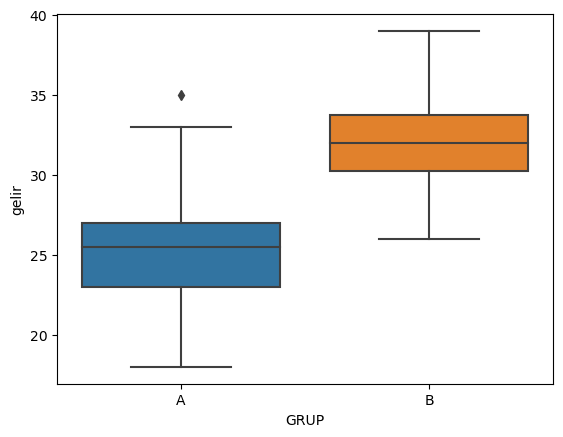

In [95]:
import seaborn as sns 
sns.boxplot(x = "GRUP", y = "gelir", data = AB);

#### Varsayım Kontrolü

In [96]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [97]:
AB.head()

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [99]:
# Normallik varsayımı( shapiro testi)

In [100]:
from scipy.stats import shapiro

In [104]:
shapiro(A_B.A) # H0 hipotezi reddedilemez

ShapiroResult(statistic=0.9789243936538696, pvalue=0.7962851524353027)

In [106]:
shapiro(A_B.B) # H0 hipotezi reddedilemez

ShapiroResult(statistic=0.9561262130737305, pvalue=0.24584470689296722)

**Varyans homejeneliği varsayımı**

H0: Varyanslar Homojendir.

H1: Varyanslar Homojen Değildir.

In [110]:
stats.levene(A_B.A, A_B.B) # H0 reddedilemez. p-value = 0.05 ten küçük olsaydı reddedebilirdik.

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

#### Hiptez Tesi

In [113]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)


TtestResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09, df=58.0)

In [114]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = -7.0287, p-değeri = 0.0000


#### Nanparametrik Bağımsız İki Örrneklem Testi

In [116]:
stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=9.557950378612535e-08)

In [117]:
test_istatistigi, pvalue = stats.mannwhitneyu(A_B["A"], A_B["B"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 89.5000, p-değeri = 0.0000


## Bağımlı iki Örneklem T Testi

**Bağımlı İki Örneklem T Testi:** Bağımlı İki Örneklem T Testi (eşleştirilmiş T testi olarak da bilinir), aynı grubun iki farklı koşul altındaki ölçümlerini karşılaştırmak için kullanılan bir istatistiksel testtir. Genellikle, bir ön test ve son test sonucu gibi iki farklı durumda aynı bireylerden elde edilen ölçümlerde kullanılır. Örneğin, bir tedavi öncesi ve sonrası ölçümleri karşılaştırmak için uygulanabilir.

**Bu testin varsayımları:**

    1.Verilerin bağımlı veya eşleştirilmiş olması (aynı kişilerin iki farklı ölçümü gibi),
    2.Farkların normal dağılıma sahip olmasıdır.

Testin sonucu, iki ölçüm arasında istatistiksel olarak anlamlı bir fark olup olmadığını gösterir. P-değeri 0.05'ten küçükse, iki durum arasında anlamlı bir fark olduğu kabul edilir

### İş Uygulaması: Şirket İçi Eğitim PPerformans Etkisi Ölçümü

**Problem:** Birr şirket aynı grup çalışanlarına birr eğitim veriyor. Bu eğitim öncesinde ve sonrasında belirli performans testleri yapılıyor.
Belirli uğraşlar sonucunda alınan bu eğitim şirketin bu çalışanlarına katma değer sağlayıp sağlamadığı ölçülmek isteniyor.

-Hipotezimizi oluşturalım:

        H0: katılımcılarrın eğitimin öncesindeki performansı ile eğitim sonrasındaki performansı aynıdır. (Eğitim etkili olmamıştır.)
        H1: katılımcılarrın eğitimin öncesindeki performansı ile eğitim sonrasındaki performansı aynı değildir. (Eğitim etkili olmuştur.)

In [119]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [121]:
oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [122]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [123]:
#BIRINCI VERI SETI
AYRIK = pd.concat([oncesi, sonrasi], axis = 1)
AYRIK.columns = ["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti: \n\n ", AYRIK.head(), "\n\n")


#IKINCI VERI SETI
#ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
#FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)
#SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")

'AYRIK' Veri Seti: 

     ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



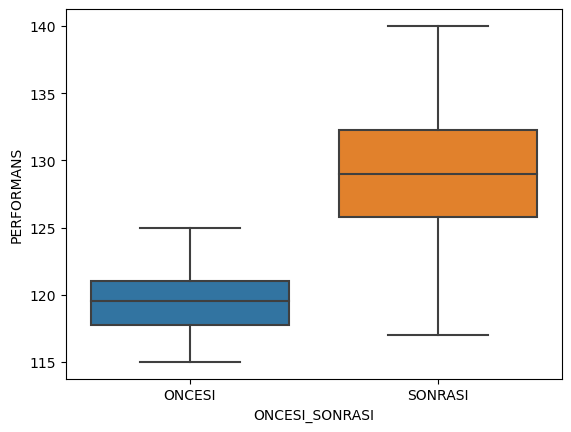

In [124]:
sns.boxplot(x = "ONCESI_SONRASI", y = "PERFORMANS", data = BIRLIKTE);

#### Varsayım Kontrolleri

In [126]:
from scipy.stats import shapiro

In [130]:
shapiro(AYRIK.ONCESI) # H0 reddedilmez.

ShapiroResult(statistic=0.9543651342391968, pvalue=0.10722016543149948)

In [132]:
shapiro(AYRIK.SONRASI) # H0 reddedilmez. p-value = 0.05

ShapiroResult(statistic=0.9780092239379883, pvalue=0.6159630417823792)

In [134]:
stats.levene(AYRIK.ONCESI, AYRIK.SONRASI) # varryansalar homojen değildir.

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

**Burada birinci yani shapiro ile yaptığımız varsayım sağlanıyor ama levene ile yaptığımız varsayımlarr sağlanmıyor. lakin biz levene ile yaptığımız varsayımı göz ardı ederrek hipotezimizi yinede test edeceğiz.**

#### Hipotez Testi

In [135]:
stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)

TtestResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11, df=39)

In [136]:
test_istatistigi, pvalue = stats.ttest_rel(AYRIK["ONCESI"], AYRIK["SONRASI"])
print('Test İstatistiği = %.5f, p-değeri = %.5f' % (test_istatistigi, pvalue))

Test İstatistiği = -9.28153, p-değeri = 0.00000


**Burada H0 reddedilir yani eğitimden önceki performans ile eğitimden sonrali performans farklıdır. Yani eğitim başarılıdır.**

#### Nanparametrik Bağımlı İki Örneklem Testi

In [141]:
stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [142]:
test_istatistigi, pvalue = stats.wilcoxon(AYRIK["ONCESI"], AYRIK["SONRASI"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 15.0000, p-değeri = 0.0000


P-value değeri 0.05'ten küçük olduğu için H0 reddedilir. Yani iki performans arasında fark vardır. Yani eğitim başarılıdır.

## İki Örneklem Oran Testi

İki Örneklem Oran Testi, iki bağımsız grubun oranlarını karşılaştırmak için kullanılan bir istatistiksel testtir. Örneğin, A ve B şehirlerinde yaşayanların %40'ının belirli bir ürünü kullanıp kullanmadığını test etmek istiyorsak, bu testi kullanabiliriz.

Bu testin varsayımları şunlardır:

        1-İki grubun birbirinden bağımsız olması,
        2-Her iki grupta yeterli sayıda gözlem bulunması.
Sonuç olarak, testin p-değeri 0.05’ten küçükse, iki oran arasında istatistiksel olarak anlamlı bir fark olduğu kabul edilir.

### İş Uygulaması: Kullanıcı Arayüzü Deneyi (AB Testi)

**Problem:** Bir web sayfasında "sepeti onayla" butonunun rengi içiin birr karar verilecektir. Kırmzı renki 'sepei onayla' ya da yeşil renkli 'sepei onayla' butonun hangisinin kullanılması gerektiğine karak verrmek için birr oran testi yapılacaktır.

**Detaylar:**

    - Yeşil renkte olan buton 1000 görüntülenme ve 300 tıklanma almıştır.
    - Kırmızı renkto olan buton 1100 görüntülenme ve 2500 tıklanma almıştır.
    
**Hipotez**
    
    H0: Yeşil buton rengi ile kırrmızı buton rrenginin geri dönütleri arrasında anlamlı, istatistiksel bir fark yoktur.
    H1: Yeşil buton rengi ile kırrmızı buton rrenginin geri dönütleri arrasında anlamlı, istatistiksel bir fark vardır.

In [143]:
from statsmodels.stats.proportion import proportions_ztest

In [146]:
basari_sayisi = np.array([300, 250])
gozlem_sayilari = np.array([1000, 1100])

In [147]:
proportions_ztest(count=basari_sayisi, nobs=gozlem_sayilari)

(3.7857863233209255, 0.0001532232957772221)

**H0 reddedilir. İki buton arasında dönüt olarak fark vardır. Eğer hangi butonun daha iyi bir dönüüt sağladığını görmek istersekte bu verileri grafiklere dökerek inceleyebiliriz.** 

## Varyans Analizi

**Varyans Analizi (ANOVA):** Üç veya daha fazla grubun ortalamaları arasında istatistiksel olarak anlamlı bir fark olup olmadığını test etmek için kullanılan bir istatistiksel yöntemdir. ANOVA, gruplar arasındaki varyans (değişkenlik) ile grup içi varyansı karşılaştırarak grupların ortalamaları arasında farklılık olup olmadığını belirler.

**Başlıca ANOVA türleri:**

1. **Tek Yönlü ANOVA**: Tek bir faktöre göre (örneğin, farklı eğitim yöntemleri) grupları karşılaştırır.
2. **İki Yönlü ANOVA**: İki farklı faktörün (örneğin, eğitim yöntemi ve cinsiyet) etkilerini ve etkileşimlerini inceler.

**Varsayımları:**

        - Gözlemlerin birbirinden bağımsız olması (grupların)
        - Normal Dağılım
        - Varyans Homojenliği

ANOVA sonucunda elde edilen p-değeri, gruplar arasında anlamlı bir fark olup olmadığını gösterir.

### İş Uygulaması: Anasayfa İçerik Stratejisi Belirleme

**Problem:**

Anasayfa'da geçirilen süre artırılmak isteniyor 

**Detaylar:**

        -Bir web sitesi için başarı kriterleri: ortalama ziyaret süresi, hemen çıkış oranı vb 
        -Uzun zaman geçiren kullanıcılarn reklamlara daha fazla tıkladığı ve markaya olan bağlılıklarının arttığı biliniyor. 
        -Buna yönelik olarak benzer haberler farklı resimler ya da farklı formatlarda hazırlanarak oluşturulan test gruplarına gösteriliyor. 
                        A: Doğal Şekilde, B: Yönlendirici, C: İlgi Çekici

**Hipotezimiz:**

    H0: M1 = M2 = M3 (grup ortalamalari arasinda ist anl. farklilik yoktur) 

    H1: Fark vardir.

In [148]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GRUP_A","GRUP_B","GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


#### Varsayım Kontrolü

ilk iki (normal dağılım ve grupların birbirinden bağımsız olması ) varyansalrını karşıladığını biliyoruz. Şimdi üç grup için bir varyans homojenliği testini de levene testi ile gerçekleştireceğiz.

öncellikle normallik varsayımı tstini gerçekleştiriyoruz.

In [149]:
from scipy.stats import shapiro

In [151]:
shapiro(ABC["GRUP_A"])

ShapiroResult(statistic=0.969743013381958, pvalue=0.5321670174598694)

In [152]:
shapiro(ABC["GRUP_B"])

ShapiroResult(statistic=0.9789853096008301, pvalue=0.7979751229286194)

In [153]:
shapiro(ABC["GRUP_C"])

ShapiroResult(statistic=0.9579201340675354, pvalue=0.273820161819458)

In [154]:
stats.levene(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

Hipotezimiz varyansalarrın homojen olduğunu belirtiyordu. P-value değerine baktığımızda varyansaların homojen olduğunu görebiliriz. 

#### Hipotez Testi

In [155]:
from scipy.stats import f_oneway

In [156]:
f_oneway(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

In [157]:
print('{:.5f}'.format(f_oneway(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])[1]))

0.00000


**Burada p-value değerrimiz 0.05'ten daha düşük birr değer de olduğu için H0 hipotezini reddederiz. Yani Gruplar arasında istatistiksel bir fark vardır.** 

In [158]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


**Bu üç grup arasında ise en çok işe yarayan yani sitede daha uzun sürre vakit geçirmelerine sebep olan haber sunuş şeklide C grubudur.**

#### Nanparametrik Hipotez Testi

Varsayalım ki yukardaki kısımda incelemiş olduğumuz varsayımlarımız(normallik varsayımı ve varyans homojenliği varsayımı) sağlanmadı.  İşte bu varsayılar sağlanmadığı zaman kullanacak olduğumuz test **Kruskal-Wallis Testi**'dir.

In [160]:
from scipy.stats import kruskal

In [161]:
kruskal(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

Burada görüneceği gibi p-value değeri 0.05'ten küçüktür. Bu yüzden H0 rreddedilir.

## Korelasyon Analizi

Korelasyon analizi, iki değişken arasındaki ilişkinin yönünü ve gücünü ölçmek için kullanılan bir istatistiksel tekniktir. Korelasyon katsayısı (genellikle 𝑟 ile gösterilir), iki değişkenin birlikte nasıl değiştiğini değerlendirir. 

**r değeri:**

    +1'e yakınsa güçlü pozitif ilişki (bir değişken arttıkça diğeri de artar),
    -1'e yakınsa güçlü negatif ilişki (bir değişken arttıkça diğeri azalır),
     0'a yakınsa ilişki yok veya çok zayıf demektir.
    
**Korelasyon Analizinin Varsayımları**

    Doğrusallık: İki değişken arasındaki ilişki doğrusal olmalıdır.
    Normal Dağılım: İdeal olarak, iki değişken de normal dağılıma sahip olmalıdır.
    Eğer normallik (normal dağılım) varsayımı sağlanıyorsa **Pearson Korelasyon Katsayısı**
    Eğer norrmallik varsayımı sağlanmıyorsa **Spearman Korelasyon Katsayısı** kullanılır.
    
Bu varsayımların sağlanması, korelasyon analizinin doğru sonuçlar vermesi açısından önemlidir.

**Hipotezimiz:**
    
    H0: P=0, Değişkenler arasında korelasyon yoktur anlamına gelir.

    H1: P≠0, Değişkenler arasında korelasyon vardır anlamına gelir.

### İş Uygulaması: Bahşiş İle Ödenen Hesap Arasındaki İlişkinin İncelenmesi

**Problem:** Bahşiş ile ödenen hesap arasında korelasyon var mı?
       
    H0: P=0, Bahşiş ile ödenen hesap arasında korelasyon yoktur.

    H1: P≠0,Bahşiş ile ödenen hesap arasında korelasyon vardır.
    
Bahşiş veri seti:

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [163]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Burada totatl_bill ile tip arasındaki ilişkiyi merak ediyoruz ama birr problem var. Bu problem veri setinin hikayesinde de anlatılmaktadır.** *total_bill* **değişkeninin içerisinde aslında** *tip* **değişkeni de vardır. Yani bahşişler de toplam faturya eklenerek yazılmıştır. Bunları birbirinden ayırmak için** *total_bill* **den** *tip* **i çıkarmamız gerekmektedir.**

In [164]:
df["total_bill"] = df["total_bill"] - df["tip"]
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


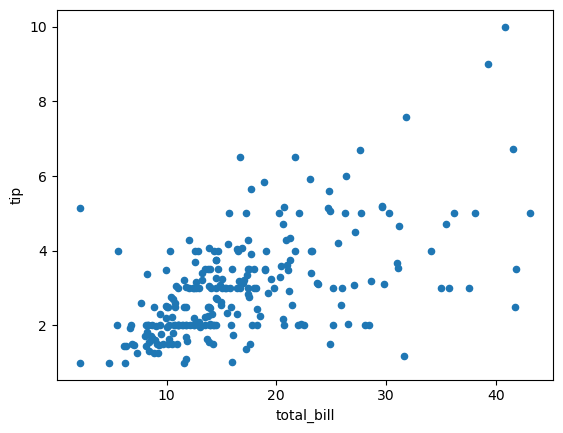

In [168]:
df.plot.scatter("total_bill", "tip");

#### Varsayım Kontrolü

In [169]:
from scipy.stats import shapiro

In [170]:
test_istatistigi, pvalue = shapiro(df["tip"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

test_istatistigi, pvalue = shapiro(df["total_bill"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 0.8978, p-değeri = 0.0000
Test İstatistiği = 0.9136, p-değeri = 0.0000


#### Hipotez Testi

##### Korelasyon Katsayısı

In [174]:
df["tip"].corr(df["total_bill"]) # Pearson Korrelasyon Kat sayısı

0.5766634471096382

In [176]:
df["tip"].corr(df["total_bill"], method="spearman") # Spearman korelasyon kat sayısı, normallik vayansını sağlamadığı için spearman korelasyon kat sayısını baz alıyorruz.

0.593691939408997

##### Korelasyonunu Anlamlılığının Testi

In [178]:
from scipy.stats import pearsonr

In [179]:
test_istatistigi, pvalue = pearsonr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5767, p-değeri = 0.0000


#### Nonparametrik Hipotez Testi

varsayımlar sağlanmadığında nonparametrik testler kullanılır.

In [184]:
from scipy import stats
stats.spearmanr(df["tip"], df["total_bill"])

SignificanceResult(statistic=0.593691939408997, pvalue=1.2452285137560276e-24)

Test sonucu incelendiğinde p-value değeri oldukça küçük çıkmaktadır. Bu yüzden değişkenler arasında ilişki yoktur diyen H0 hipotezi reddedilmektedir. Yani değişkenler arasında ilişki vardır, bu ilişki anlamlı ve orta şiddetli bir ilişkidir. 

In [187]:
test_istatistigi, pvalue = stats.spearmanr(df["tip"], df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5937, p-değeri = 0.0000


In [188]:
test_istatistigi, pvalue = stats.kendalltau(df["tip"], df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.4401, p-değeri = 0.0000
